# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

# Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Data Analysis Process
#### Remember the process:

- **Case Study**
- **Get data**
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting


# Instructions

1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info).

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a new dataframe using only the numerical data called numerical_df.  Use this for the following questions.

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. 

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.


In [229]:
# Import the necessary libraries
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [230]:
# Load the dataframe
customer_df = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/class_11/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

# Standardize columns name
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ', '_')) 
customer_df.columns = cols

customer_df

# Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

customer_df


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [231]:
# First look at its main features (head, shape, info).

display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

None

In [232]:
# Create a new dataframe using only the numerical data called numerical_df

numerical_df = customer_df.select_dtypes(include = np.number)

numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [233]:
# Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful.
# Store continuous data into a continuous_df variable and do the same for discrete_df

def continuous_discrete(df):
    '''
    The continuous_discrete function accepts a DataFrame (df) as its argument.

    It iterates through each column in the DataFrame and checks if the column's data type is 'float64'.
    
    If the data type is 'float64', the column is identified as continuous and its name is added to the continuous_columns list. 
    
    If the data type is different, the column is identified as discrete and its name is added to the discrete_columns list.

    Two separate DataFrames (continuous_df and discrete_df) are created using the identified column names. The continuous_df contains columns identified as continuous, and discrete_df contains columns identified as discrete.

    Finally, the function returns these two DataFrames, and the code at the end:
    '''
    continuous_columns = []
    discrete_columns = []

    for col in df.columns:
        unique_values = df[col].unique()

        if df[col].dtype == 'float64':
            continuous_columns.append(col)
            
        else:
            discrete_columns.append(col)
    
    continuous_df = df[continuous_columns]
    discrete_df = df[discrete_columns]

    return continuous_df, discrete_df

continuous_df, discrete_df = continuous_discrete(numerical_df)

continuous_df



,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


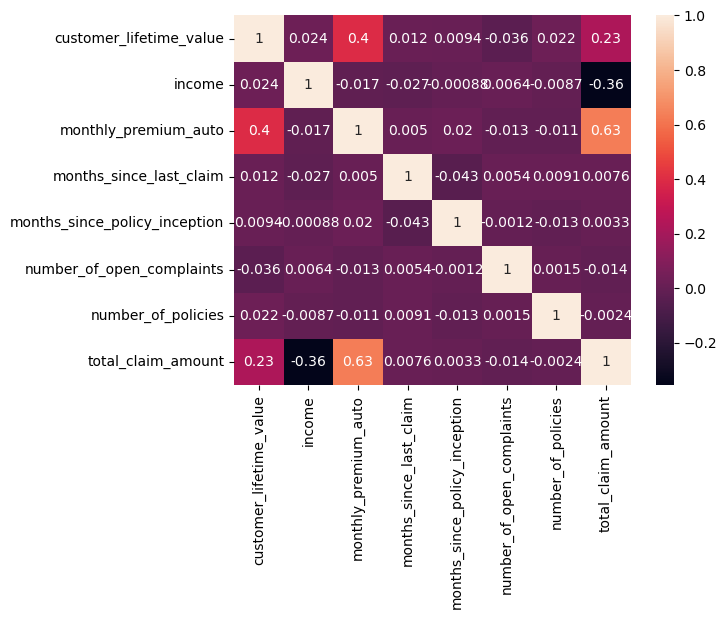

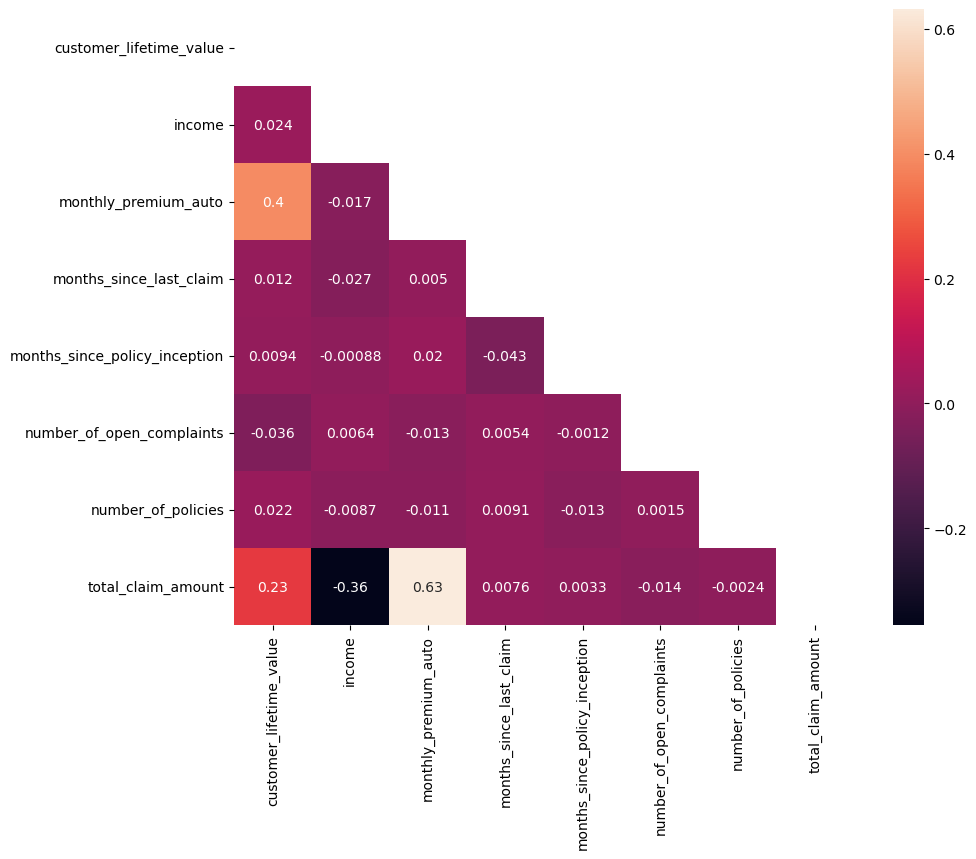

In [234]:
# Plot a correlation matrix, comment what you see.

correlations_matrix = numerical_df.corr()
correlations_matrix

sns.heatmap(correlations_matrix, annot=True)
plt.show()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# The correlation Matrix shows:
# A moderate to strong positive correlation (0.63) between total_claim_amount and monthly_premium_auto feature
# A moderate negative correlation (-0.36) between total_claim_amount and income
# A weak positive correlation (0.23) total_claim_amount and customer_lifetime_value


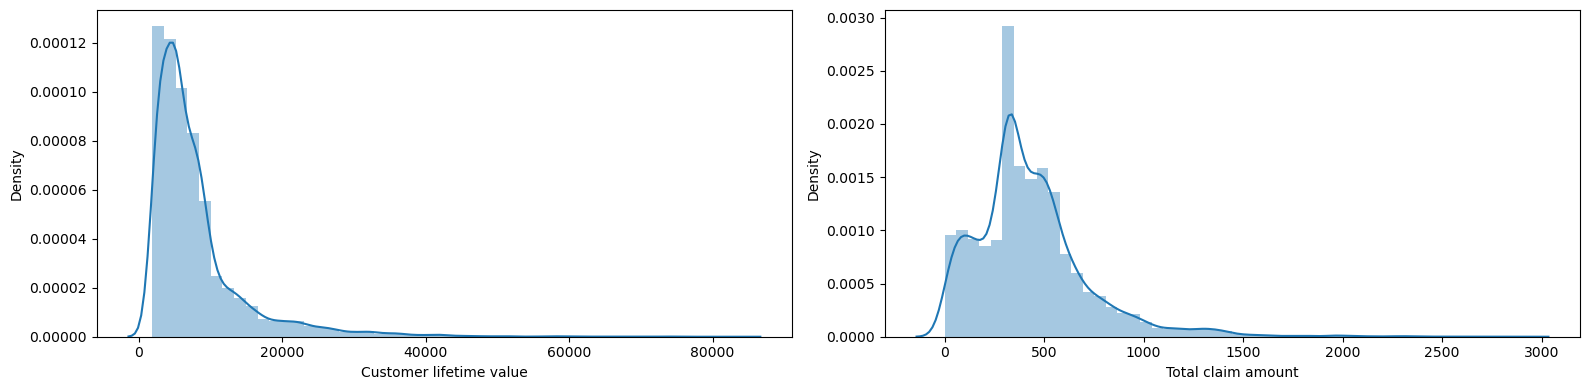

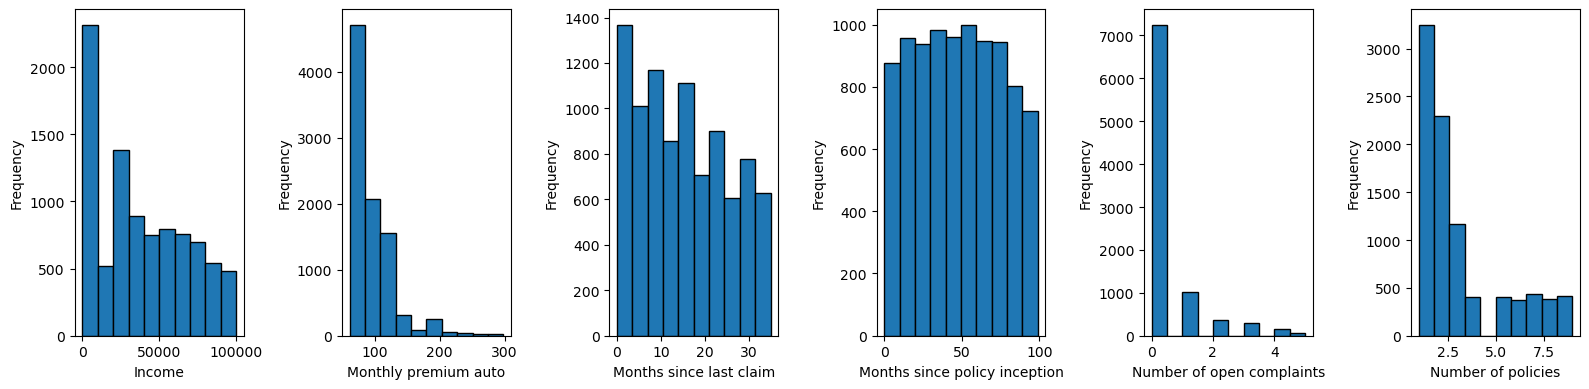

In [235]:
# Create a function to plot every discrete/ continuous variable.

# Be Careful, you may need to change the plot type to one better suited for continuous data

# This functions are copied and adjusted from the customer analysis final round lab
def plot_cont_distribution(data, columns):
    '''This function automatizes the creation of the dist plots on seaborn'''
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(16, 4))
    for i, column in enumerate(columns):
        sns.distplot(data[column], ax=axes[i])
        axes[i].set_xlabel(column.capitalize().replace('_', ' '))
    plt.tight_layout()
    plt.show()

def plot_discr_distribution(data, columns):
    
    '''This automatizes the creation of the hist plots on matplotlib'''
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(16, 4))
    for i, column in enumerate(columns):
        axes[i].hist(data[column], bins=10, edgecolor='black') 
        axes[i].set_xlabel(column.capitalize().replace('_', ' '))
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_cont_distribution(continuous_df, continuous_df.columns)

plot_discr_distribution(discrete_df, discrete_df.columns)



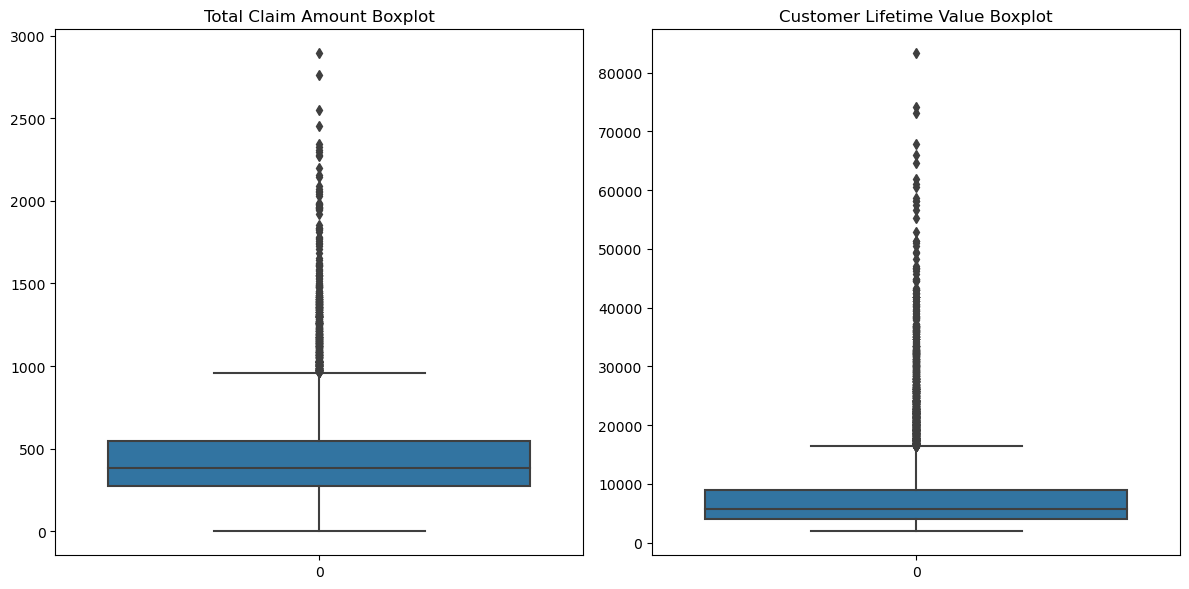

In [236]:
# Spot outlier in the continous variables

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # This to display the two plots in one figure

# First boxplot for 'total_claim_amount'
sns.boxplot(continuous_df['total_claim_amount'], ax=axes[0])
axes[0].set_title('Total Claim Amount Boxplot')

# Second boxplot for 'customer_lifetime_value'
sns.boxplot(continuous_df['customer_lifetime_value'], ax=axes[1])
axes[1].set_title('Customer Lifetime Value Boxplot')

plt.tight_layout()
plt.show()

In [237]:
# Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. 

display(continuous_df.shape)
display(continuous_df['customer_lifetime_value'].describe())
display(continuous_df['total_claim_amount'].describe())

# I will remove the outliers that stand behind and above the IQR


(9134, 2)

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

In [238]:
# Remove customer lifetime value outliers using IQR
Q1_cust = continuous_df['customer_lifetime_value'].quantile(0.25)
Q3_cust = continuous_df['customer_lifetime_value'].quantile(0.75)
IQR_cust = Q3_cust - Q1_cust
lower_bound_cust = Q1_cust - 1.5 * IQR_cust
upper_bound_cust = Q3_cust + 1.5 * IQR_cust

continuous_df_no_out = continuous_df[(continuous_df['customer_lifetime_value'] >= lower_bound_cust) & (continuous_df['customer_lifetime_value'] <= upper_bound_cust)]

# Remove total claim amount outliers using IQR
Q1_claim = continuous_df_no_out['total_claim_amount'].quantile(0.25)
Q3_claim = continuous_df_no_out['total_claim_amount'].quantile(0.75)
IQR_claim = Q3_claim - Q1_claim
lower_bound_claim = Q1_claim - 1.5 * IQR_claim
upper_bound_claim = Q3_claim + 1.5 * IQR_claim

continuous_df_no_out = continuous_df_no_out[(continuous_df_no_out['total_claim_amount'] >= lower_bound_claim) & (continuous_df_no_out['total_claim_amount'] <= upper_bound_claim)]


display(continuous_df_no_out.shape)
display(continuous_df_no_out['customer_lifetime_value'].describe())
display(continuous_df_no_out['total_claim_amount'].describe())


(7962, 2)

count     7962.000000
mean      6170.335441
std       3185.137725
min       1898.007675
25%       3682.259212
50%       5386.089192
75%       8038.324824
max      16407.664610
Name: customer_lifetime_value, dtype: float64

count    7962.000000
mean      386.070805
std       207.955837
min         0.099007
25%       255.588939
50%       357.842312
75%       518.718984
max       950.400000
Name: total_claim_amount, dtype: float64

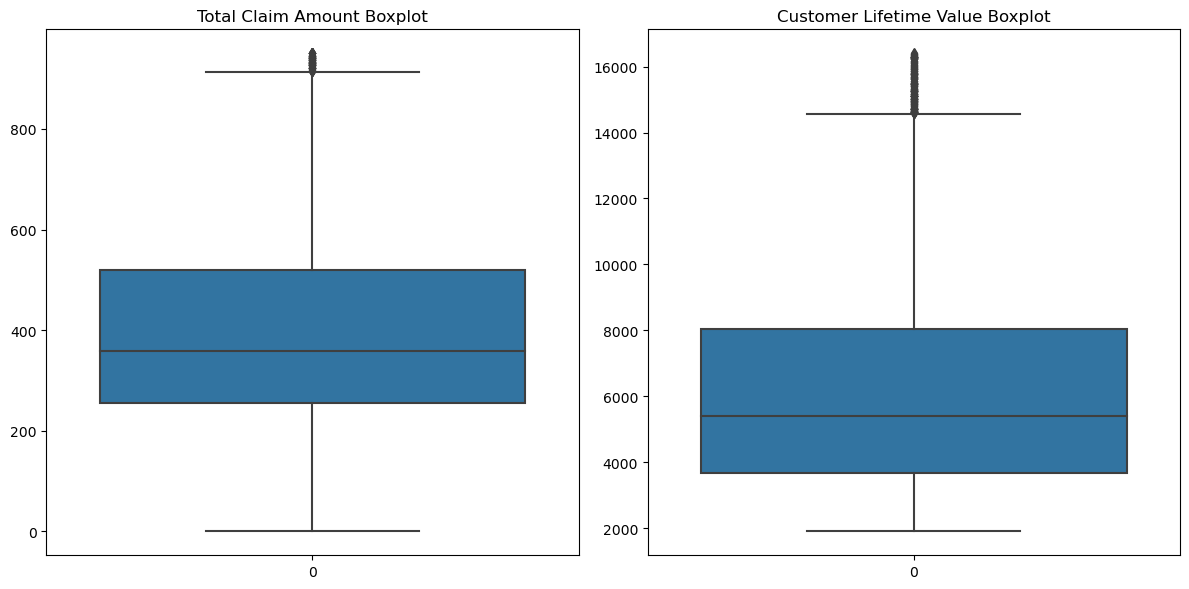

In [239]:
# Updated box-plots

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # This to display the two plots in one figure

# First boxplot for 'total_claim_amount'
sns.boxplot(continuous_df_no_out['total_claim_amount'], ax=axes[0])
axes[0].set_title('Total Claim Amount Boxplot')

# Second boxplot for 'customer_lifetime_value'
sns.boxplot(continuous_df_no_out['customer_lifetime_value'], ax=axes[1])
axes[1].set_title('Customer Lifetime Value Boxplot')

plt.tight_layout()
plt.show()

In [240]:
# Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

# Concate the two dfs
customer_df_updated = pd.concat([continuous_df_no_out,discrete_df], axis = 1)

customer_df_updated.isnull().sum()

selected_nan_columns = ['customer_lifetime_value', 'total_claim_amount']

# Filter the DataFrame to get the rows with NaN values in the selected columns

nan_rows = customer_df_updated[selected_nan_columns].isna().any(axis=1)

rows_with_nan = customer_df_updated[nan_rows] # Dataframe with nan rows
    
display(rows_with_nan.shape) # 1172 rows

display(customer_df_updated.shape) # 9134 rows

percentage_of_nans = (rows_with_nan.shape[0] / customer_df_updated.shape[0]) * 100

display(percentage_of_nans)

# Nan values account for 12.8% of the DataFrame. I think is better to NOT REMOVE outliers

# Concate the two dfs keeping outliers

customer_df_with_out = pd.concat([continuous_df,discrete_df], axis = 1)




(1172, 8)

(9134, 8)

12.831180205824392

In [241]:
# Save the numerical_df to csv as numerical.csv

# Define the filename for the CSV file
filename = ' numerical.csv'

# Save the DataFrame to a CSV file
customer_df_with_out.to_csv(filename, index=True)